In [1]:
import ctypes
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils

import importlib
import utils

importlib.reload(utils)

<module 'utils' from '/home/tellocam/Projects/AMP/framework/utils.py'>

In [2]:
binary = ctypes.CDLL( "build/sharedLibrary.so" )
binary.benchLockOMP.restype = utils.benchData
binary.benchCriticalOMP.restype = utils.benchData
binary.benchTAS.restype = utils.benchData
binary.benchTATAS.restype = utils.benchData
binary.benchTicket.restype = utils.benchData
binary.benchArray.restype = utils.benchData
binary.benchCLH.restype = utils.benchData
binary.benchMCS.restype = utils.benchData
# binary.benchHemlock.restype = utils.benchData

In [3]:
maxThreads = 10
total_acqs = 1000
bench_iters = 100

threadNum = [i for i in range(2, maxThreads+1)]
bmListLockOMP = {threads: [binary.benchLockOMP(threads, total_acqs, 1) for _ in range(bench_iters)] for threads in threadNum}
bmListCriticalOMP = {threads: [binary.benchCriticalOMP(threads, total_acqs, 1) for _ in range(bench_iters)] for threads in threadNum}
bmListTAS = {threads: [binary.benchTAS(threads, total_acqs, 1) for _ in range(bench_iters)] for threads in threadNum}
bmListTATAS = {threads: [binary.benchTATAS(threads, total_acqs, 1) for _ in range(bench_iters)] for threads in threadNum}
bmListTicket = {threads: [binary.benchTicket(threads, total_acqs, 1) for _ in range(bench_iters)] for threads in threadNum}
bmListArray = {threads: [binary.benchArray(threads, total_acqs, 1) for _ in range(bench_iters)] for threads in threadNum}
bmListCLH = {threads: [binary.benchCLH(threads, total_acqs, 1) for _ in range(bench_iters)] for threads in threadNum}
bmListMCS = {threads: [binary.benchMCS(threads, total_acqs, 1) for _ in range(bench_iters)] for threads in threadNum}
# bmListHemlock = {threads: [binary.benchHemlock(threads, total_acqs, 1) for _ in range(bench_iters)] for threads in threadNum}

df_LockOMP = utils.dataframeBuilder(bmListLockOMP).fillna(0)
df_CriticalOMP = utils.dataframeBuilder(bmListCriticalOMP).fillna(0)
df_TAS = utils.dataframeBuilder(bmListTAS).fillna(0)
df_TATAS = utils.dataframeBuilder(bmListTATAS).fillna(0)
df_Ticket = utils.dataframeBuilder(bmListTicket).fillna(0)
df_array = utils.dataframeBuilder(bmListArray).fillna(0)
df_CLH = utils.dataframeBuilder(bmListCLH).fillna(0)
df_MCS = utils.dataframeBuilder(bmListMCS).fillna(0)
# df_Hemlock = utils.dataframeBuilder(bmListHemlock)

In [4]:
print(df_MCS)

   threads  meanTime  stddTime   meanFail       stddFail      meanWait  \
0        2  0.000466  0.000875    8684.50    3482.004476  1.647000e-09   
1        3  0.000851  0.001500   54393.70  116357.026381  6.472000e-09   
2        4  0.000342  0.000603   79206.45   95257.041657  1.959000e-09   
3        5  0.000640  0.000965  175020.39  255458.429569  7.283000e-09   
4        6  0.001082  0.001642  171399.50  237164.459106  1.833500e-08   
5        7  0.000984  0.001277  243370.41  241898.839107  3.181100e-08   
6        8  0.000460  0.000659  234679.31  234031.186468  1.311100e-08   
7        9  0.000842  0.001171  361239.53  411126.423813  1.813200e-08   
8       10  0.000960  0.001529  328598.20  482802.982950  2.885500e-08   

       stddWait  meanFair   stddFair        meanTP        stddTP  
0  9.682153e-09     3.911  14.859441  4.957121e+06  1.862822e+06  
1  5.549152e-08     5.418  14.689693  4.687710e+06  2.474654e+06  
2  1.590226e-09     1.657   6.859391  5.500892e+06  1.8394

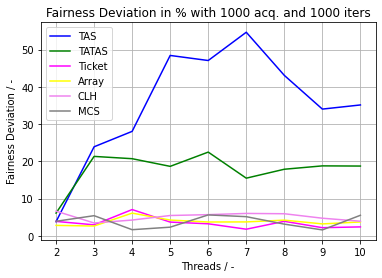

In [13]:
plotWhat = "Fair"
LockList = ["OMP Lock", "OMP Critical", "TAS", "TATAS", "Ticket", "Array", "CLH", ]

# utils.plotStuff("threads", plotWhat, "OMP Lock", df_LockOMP, "black")
# utils.plotStuff("threads", plotWhat, "OMP Critical", df_CriticalOMP, color = "red")
utils.plotStuff("threads", plotWhat, "TAS", df_TAS, "blue")
utils.plotStuff("threads", plotWhat, "TATAS", df_TATAS, "green")
utils.plotStuff("threads", plotWhat, "Ticket", df_Ticket, "magenta")
utils.plotStuff("threads", plotWhat, "Array", df_array, "yellow")
utils.plotStuff("threads", plotWhat, "CLH", df_CLH, "violet")
utils.plotStuff("threads", plotWhat, "MCS", df_MCS, "gray")

plt.title("Fairness Deviation in % with 1000 acq. and 1000 iters")
plt.xlabel("Threads / -")
plt.ylabel("Fairness Deviation / -")
plt.legend()
plt.grid()